# Стримчик

Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру 
компьютерные игры. Из открытых источников доступны исторические данные о 
продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель проекта**

    Вам нужно выявить определяющие успешность игры закономерности. 
    Это позволит сделать ставку на потенциально популярный продукт 
    и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы 
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating 
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных 
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную 
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для 
подростков».


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
# Импортируем библиотеки pandas
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# И все используемое далее
from scipy import stats as st

# Убираем длинные циферки
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
# Читаем файл с данными и сохраняем в df
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    ! gdown --"Вырезано цензурой"
    df = pd.read_csv('/content/games.csv')

In [ ]:
# Смотрим табличку
display(df.columns)
# С названиями что-то не то. "Шапку" к стандартному виду
df.columns = df.columns.str.lower()
display(df)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Таблица данных

In [ ]:
# Табличку к рабочему виду
df_rus = df.rename(columns={'name': 'название',
                            'platform': 'платформа',
                            'year_of_release': 'год_выпуска',
                            'genre': 'жанр',
                            'na_sales': 'продажи_сша',
                            'eu_sales': 'продажи_евр',
                            'jp_sales': 'продажи_яп',
                            'other_sales': 'продажи_др',
                            'critic_score': 'оценка_крит',
                            'user_score': 'оценка_польз',
                            'rating': 'рейтинг'})

df_rus

,название,платформа,год_выпуска,жанр,продажи_сша,продажи_евр,продажи_яп,продажи_др,оценка_крит,оценка_польз,рейтинг
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Инфо. Пропуски. Describe.

In [ ]:
# Посмотрим заполненость таблицы
print()
print('Инфо:')
print(df_rus.info()) # сколько значений и в каком формате
print()
print('Пропусков:')
print(df_rus.isna().mean()) # подсчёт пропусков в долях (перевод в % - лишний код)
print()
print('describe:')
display(df_rus.describe()) # вдруг чего "на глазок" проявится 
print()
print('Дубликатов =', df.duplicated().sum()) # проверим дубликаты


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   название      16713 non-null  object 
 1   платформа     16715 non-null  object 
 2   год_выпуска   16446 non-null  float64
 3   жанр          16713 non-null  object 
 4   продажи_сша   16715 non-null  float64
 5   продажи_евр   16715 non-null  float64
 6   продажи_яп    16715 non-null  float64
 7   продажи_др    16715 non-null  float64
 8   оценка_крит   8137 non-null   float64
 9   оценка_польз  10014 non-null  object 
 10  рейтинг       9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Пропусков:
название       0.00
платформа      0.00
год_выпуска    0.02
жанр           0.00
продажи_сша    0.00
продажи_евр    0.00
продажи_яп     0.00
продажи_др     0.00
оценка_крит    0.51
оценка_польз   0.40
рейтинг        0.40
dtype: float64

describe:


,год_выпуска,продажи_сша,продажи_евр,продажи_яп,продажи_др,оценка_крит
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00



Дубликатов = 0


### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


##### Вывод

    - Может помешать в расчетах не верный формат данных:

        год_выпуска   16446 non-null  float64
        оценка_польз  10014 non-null  object 

    А может и не помешать.

    - Полностью заполнены следующие поля:

        название       0.00
        платформа      0.00
        жанр           0.00
        продажи_сша    0.00
        продажи_евр    0.00
        продажи_яп     0.00
        продажи_др     0.00


    - До 10% пропусков в:

        год_выпуска    0.02

    - Серьезно не заполнены:

        оценка_крит    0.51
        оценка_польз   0.40
        рейтинг        0.40
        
    - Без принудительного дозаполнения можем оперировать минимум следующим количеством значений:

        оценка_крит   8137
        оценка_польз  10014 
        рейтинг       9949

    Вполне достаточно, чтобы пооценивать.

Разброс параметров и очевидные аномалии оценим в следующем разделе.

## Шаг 2. Подготовьте данные

*    **[ V ]**  Замените названия столбцов (приведите к нижнему регистру);
*    **[ V ]**  Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
        *    --пока тип данных не меняем, т.к. это потребует дозаполнить недостающие значения, что повлияет на математику последующих вопросов

*    **[ V ]**  Обработайте пропуски при необходимости:
    *    [ V ]  Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
            *    -- пока пропуски не заполняем, т.к. это повлияет на математику последующих вопросов
    *    [ V ]  Опишите причины, которые могли привести к пропускам;
            * -- данные сведены из несогласованных по количеству значений таблиц
            * -- технический сбой
            * -- человеческий фактор
    *    [ V ]  Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
*    **[ V ]**  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


### название:

In [ ]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(df['name'].sort_values().unique()).to_frame().rename(columns={0 : 'название'}))

# Есть названия выбившиеся из алфавитного порядка.
# Не порядок, но пока без надобности.

,название
0,Beyblade Burst
1,Fire Emblem Fates
2,Frozen: Olaf's Quest
3,Haikyu!! Cross Team Match!
4,Tales of Xillia 2
5,'98 Koshien
6,.hack//G.U. Vol.1//Rebirth
7,.hack//G.U. Vol.2//Reminisce
8,.hack//G.U. Vol.2//Reminisce (jp sales)
9,.hack//G.U. Vol.3//Redemption


### платформа:

In [ ]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(df['platform'].sort_values().unique()).to_frame().rename(columns={0 : 'платформа:'}))

,платформа:
0,2600
1,3DO
2,3DS
3,DC
4,DS
5,GB
6,GBA
7,GC
8,GEN
9,GG


### год_выпуска:

In [ ]:
# df['year_of_release'] = pd.to_datetime( df['year_of_release'], format='%Y' )
# df['year_of_release'] = df['year_of_release'].dt.year

display('год_выпуска:', df['year_of_release'].sort_values().unique())

# Формат float не подходящий для года выпуска, но это не повод дозаполнять 2% пропусков значений

'год_выпуска:'

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

### жанр:

In [ ]:
display('жанр:', df['genre'].sort_values().unique())

'жанр:'

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

### продажи_сша:

In [ ]:
display('продажи_сша:', df['na_sales'].sort_values().unique())

'продажи_сша:'

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

### продажи_евр:

In [ ]:
display('продажи_евр:', df['eu_sales'].sort_values().unique())

'продажи_евр:'

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

### продажи_яп:

In [ ]:
display('продажи_яп:', df['jp_sales'].sort_values().unique())

'продажи_яп:'

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

### продажи_др:

In [ ]:
display('продажи_др:', df['other_sales'].sort_values().unique())

'продажи_др:'

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.600e-01,
       6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01, 7.200e-01,
       7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01, 7.800e-01,
       7.900e-01, 8.000e-01, 8.100e-01, 8.200e-01, 

### оценка_крит:

In [ ]:
display('оценка_крит:', df['critic_score'].sort_values().unique())

'оценка_крит:'

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

### оценка_польз:

In [ ]:
display('оценка_польз:', df['user_score'].sort_values().unique())

print()
# "tbd" - to be determined - специально введенное значение
# 2424 шт из 10014.
print('"tbd" значений', df[df['user_score'] == 'tbd']['user_score'].count(), 'шт. из', 
      df['user_score'].count(), '=', 
      100*df[df['user_score'] == 'tbd']['user_score'].count()/df['user_score'].count(), '%')
# Не трогаем, пока не мешает.

'оценка_польз:'

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)


"tbd" значений 2424 шт. из 10014 = 24.20611144397843 %


### рейтинг:

In [ ]:
display('рейтинг:', df['rating'].sort_values().unique())

'рейтинг:'

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

### Суммарные продажи во всех регионах в отдельном столбце

In [ ]:
#df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


##### Вывод

    - Есть названия выбившиеся из алфавитного порядка.
    - Формат float не подходящий для года выпуска.
    - Оценка пользователей мало того, что не заполнена на 40%, так и имеющиеся на четверть вместо цыфр имеют "tdm".

Пока ничего не трогаем - ничего критичного нет.

In [ ]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  sum_sales        16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во NaN 2 , про

## Шаг 3. Проведите исследовательский анализ данных



*   **[ V ]**  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
*   **[ V ]**  Посмотрите, как менялись продажи по платформам. 
*   **[ V ]**  Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
*   **[ V ]**  За какой характерный срок появляются новые и исчезают старые платформы?
*   **[ V ]**  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
*   **[ V ]**  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
*   **[ V ]**  Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
*   **[ V ]**  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.
*   **[ V ]**  Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### Сколько игр выпускалось в разные годы

,count
,name
year_of_release,
"1,980.00",9
"1,981.00",46
"1,982.00",36
"1,983.00",17
"1,984.00",14
"1,985.00",14
"1,986.00",21
"1,987.00",16



Всего значений: 16715



'Отсеиваем до 5% :'

,count
year_group,
"(0, 1995]",707
"(1995, 2016]",15739


<AxesSubplot:xlabel='year_of_release'>

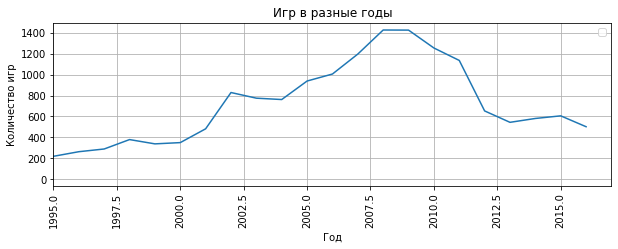

In [ ]:
# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

# Делаем выборку по годам выпуска
year_pt = df.pivot_table(index=['year_of_release'], values='name', aggfunc=['count'])

# Вкл/Выкл полнотабличный формат
pd.set_option('display.max_rows', None)

# Сколько игр выпускалось в разные годы
print()
display(year_pt)

# Отсеиваем мусорный хвост (значения портящие внешний вид графика)
df['year_group'] = pd.cut(df['year_of_release'],[0, 1995, 2016])
print()
print('Всего значений:', len(df['year_of_release']))
print()
display('Отсеиваем до 5% :', df.groupby('year_group')['year_of_release'].agg(['count']))
print()
display(pd.pivot_table(df, 
                       index=['year_of_release'], 
                       values=['name'], 
                       aggfunc=['count']
                       ).plot(xlim=(1995, 2017), 
                              grid=True, 
                              figsize=(10, 3)))
plt.xlabel("Год")
plt.xticks(x=['year_of_release'], rotation = 90)
plt.ylabel("Количество игр")
plt.title('Игр в разные годы')
plt.legend('')
plt.show()

# Встречный вопрос: по какому критерию определять важность?

##### Вывод

    2008-2009 годы были пиком в выпуске игр.
    Далее идет спад в разработке.

### Как менялись продажи по платформам


Как менялись продажи по платформам.


,platform_,sum_sum_sales,sum_sales_group_
0,PS2,"1,255.77","(100, 1300]"
1,X360,971.42,"(100, 1300]"
2,PS3,939.65,"(100, 1300]"
3,Wii,907.51,"(100, 1300]"
4,DS,806.12,"(100, 1300]"
5,PS,730.86,"(100, 1300]"
6,GBA,317.85,"(100, 1300]"
7,PS4,314.14,"(100, 1300]"
8,PSP,294.05,"(100, 1300]"
9,PC,259.52,"(100, 1300]"



Общая сумма: 8915.71



'Отсеиваем до 5% :'

,sum
sum_sales_group_,
"(0, 100]",318.60
"(100, 1300]","8,597.11"


<AxesSubplot:xlabel='platform_', ylabel='sum_sum_sales'>

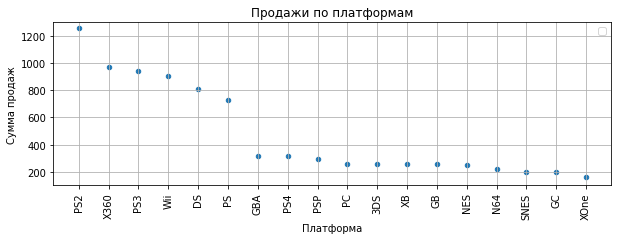

In [ ]:
# Посмотрите, как менялись продажи по платформам. 
# Выберите платформы с наибольшими суммарными продажами.

# Делаем выборку по платформам
sales_platform_pt = df.pivot_table(index=['platform'], 
                                   values='sum_sales', 
                                   aggfunc=['sum']
                                   ).sort_values(by=(  'sum', 'sum_sales'), 
                                                 ascending=False).reset_index()

# Отсеиваем мусорный хвост
sales_platform_pt['sum_sales_group'] = pd.cut(sales_platform_pt[(  'sum', 'sum_sales')],[0, 100, 1300])

# Убираем второй этаж в шапке
sales_platform_pt.columns = ['_'.join(col).strip() for col in sales_platform_pt.columns.values]

print()
print('Как менялись продажи по платформам.')
display(sales_platform_pt)
print()
print('Общая сумма:', df['sum_sales'].sum())
print()
display('Отсеиваем до 5% :', sales_platform_pt.groupby('sum_sales_group_')['sum_sum_sales'].agg(['sum']))
print()

# Ограничиваем график по оси Y до >100 млн. копий
sales_platform_pt_group = sales_platform_pt[sales_platform_pt['sum_sum_sales'] >= 100]

display(sales_platform_pt_group.plot(x='platform_', 
                                     y='sum_sum_sales', 
                                     ylim=(100, 1300), 
                                     kind='scatter', 
                                     grid=True, 
                                     figsize=(10, 3)))
plt.xlabel("Платформа")
plt.xticks(x=['platform_'], rotation = 90)
plt.ylabel("Сумма продаж")
plt.title('Продажи по платформам')
plt.legend('')
plt.show()

##### Вывод

    - Определенно среди консолей наблюдаются 6 лидеров.
      А PS2 и из них выделяется.
    - Большинство консолей имеют продажи на уровне РС.

### Распределение продаж по годам


Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 


,year_of_release_,platform_,count_sum_sales,sum_sum_sales
125,"2,004.00",PS2,259,211.81
171,"2,009.00",Wii,325,206.97
113,"2,002.00",PS2,280,205.38
116,"2,003.00",PS2,256,184.31
161,"2,008.00",Wii,282,171.32
...,...,...,...,...
63,"1,996.00",PCFX,1,0.03
18,"1,988.00",PC,1,0.03
45,"1,994.00",3DO,1,0.02
151,"2,007.00",DC,1,0.02


<AxesSubplot:xlabel='platform_', ylabel='year_of_release_'>

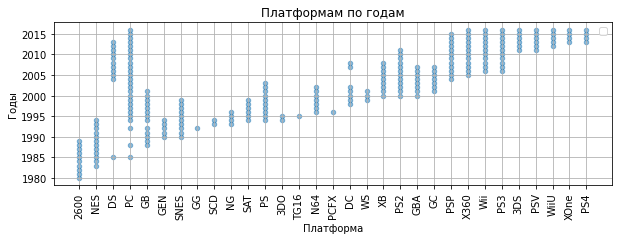

In [ ]:
# Вкл/Выкл полнотабличный формат
pd.set_option('display.max_rows', 11)

# Постройте распределение по годам. 

# Делаем выборку по годам выпуска и платформам
sales_year_platf_pt = df.pivot_table(index=['year_of_release', 'platform'], 
                                     values='sum_sales', 
                                     aggfunc=['count', 'sum']
                                     ).sort_values(by='year_of_release').reset_index()

# Убираем второй этаж в шапке в отдельной таблице (по первой таблице график интереснее)
sal_y_pl_pt_s = sales_year_platf_pt
sal_y_pl_pt_s.columns = ['_'.join(col).strip() for col in sal_y_pl_pt_s.columns.values]
sal_y_pl_pt_s = sal_y_pl_pt_s.sort_values(by='sum_sum_sales', ascending=False)

print()
print('Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. ')
display(sal_y_pl_pt_s)
print()
display(sales_year_platf_pt.plot(x='platform_', 
                                 y='year_of_release_', 
                                 kind='scatter', 
                                 alpha=0.5, 
                                 grid=True, 
                                 figsize=(10, 3)))
plt.xlabel("Платформа")
plt.xticks(rotation = 90)
plt.ylabel("Годы")
plt.title('Платформам по годам')
plt.legend('')
plt.show()

##### Вывод

    - Игровые консоли приходят и уходят, а РС с 1985 года и по сегодня.
    - Некоторые консоли приносят больше денег чем РС, хоть и не долго.

### Срок появления и исчезновения платформ

#### Срок исчезновения платформ

In [ ]:
# За какой характерный срок появляются новые и исчезают старые платформы?

# Добавляем столбец возраст (срок жизни)
df = df.assign(age = df.platform)
for platform in df['platform'].unique():
    age_value = (df[(df['platform'] == platform)]['year_of_release'].max()) - (df[(df['platform'] == platform)]['year_of_release'].min()) + 1
    df['age'] = np.where((df.age == platform), age_value, df.age)

print()
print('Пропусков в age:', df['age'].isna().mean())

# Делаем выборку по платформам, сроку жизни и годам выпуска 
sales_platf_year_pt = pd.pivot_table(df,
                                     index=['platform', 'age', 'year_of_release'],
                                     values=['sum_sales'],
                                     aggfunc={'count', 'sum'})

print()
sales_platf_year_pt = sales_platf_year_pt.reset_index()
print('Статистически средний строк жизни платформы:')
print('    - медиана =', sales_platf_year_pt['age'].median())
print('    - среднеарифметическое =', sales_platf_year_pt['age'].mean())
print()
display(sales_platf_year_pt)


Пропусков в age: 0.0

Статистически средний строк жизни платформы:
    - медиана = 11.0
    - среднеарифметическое = 12.592436974789916



platform   age year_of_release sum_sales      
                                       count   sum
0       2600 10.00        1,980.00         9 11.38
1       2600 10.00        1,981.00        46 35.68
2       2600 10.00        1,982.00        36 28.88
3       2600 10.00        1,983.00        11  5.84
4       2600 10.00        1,984.00         1  0.27
..       ...   ...             ...       ...   ...
233       XB  9.00        2,008.00         1  0.18
234     XOne  4.00        2,013.00        19 18.96
235     XOne  4.00        2,014.00        61 54.07
236     XOne  4.00        2,015.00        80 60.14
237     XOne  4.00        2,016.00        87 26.15

[238 rows x 5 columns]

##### Вывод

    Средний срок жизни игравых платформ 11-12 лет.

#### Срок появления платформ

In [ ]:
# Добавляем столбец первый год (не как в прошлый раз)
df = df.assign(year_first = df.platform)
for platform in df['platform'].unique():
    year_first_min = (df[(df['platform'] == platform)]['year_of_release'].min())
    df['year_first'].where(~(df.year_first == platform), other=year_first_min, inplace=True)

print()
print('Пропусков в year_first:', df['year_first'].isna().mean())

# Делаем выборку по платформам и годам выпуска 
year_first_pt = pd.pivot_table(df,
                               index=['platform', 'year_first'],
                               values=['sum_sales'],
                               aggfunc={'count', 'sum'}
                               ).sort_values(by='year_first').reset_index()

print()
display(year_first_pt)


Пропусков в year_first: 0.0



platform year_first sum_sales       
                           count    sum
0      2600   1,980.00       133  96.98
1       NES   1,983.00        98 251.05
2        DS   1,985.00      2151 806.12
3        PC   1,985.00       974 259.52
4        GB   1,988.00        98 255.46
..      ...        ...       ...    ...
26      3DS   2,011.00       520 259.00
27      PSV   2,011.00       430  54.07
28     WiiU   2,012.00       147  82.19
29      PS4   2,013.00       392 314.14
30     XOne   2,013.00       247 159.32

[31 rows x 4 columns]


Статистически средний строк появления платформы:
    - медиана = 1.0
    - среднеарифметическое = 1.064516129032258



,platform,year_first,sum_salescount,sum_salessum,before_prev_platf
0,2600,"1,980.00",133,96.98,0
1,NES,"1,983.00",98,251.05,3.00
2,DS,"1,985.00",2151,806.12,2.00
3,PC,"1,985.00",974,259.52,0.00
4,GB,"1,988.00",98,255.46,3.00
...,...,...,...,...,...
26,3DS,"2,011.00",520,259.00,5.00
27,PSV,"2,011.00",430,54.07,0.00
28,WiiU,"2,012.00",147,82.19,1.00
29,PS4,"2,013.00",392,314.14,1.00


<AxesSubplot:xlabel='platform'>

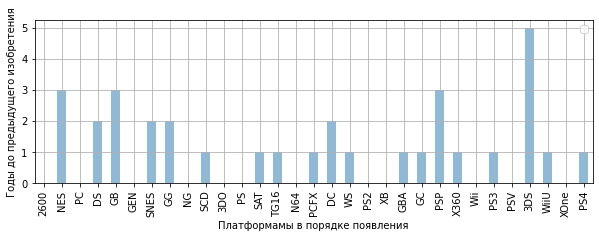

In [ ]:
# Убираем ругательства Python:
pd.options.mode.chained_assignment = None  # default='warn'

# Делаем колонку под срок появления платформ относительно предыдущей
year_first_pt = year_first_pt.assign(before_prev_platf = year_first_pt.platform)

# Убираем мультииндекс
year_first_pt.columns = year_first_pt.columns.map(''.join)

# Рассчитываем срок появления платформ
for i in range(len(year_first_pt['platform'])):
    try:
        before_prev_pl = year_first_pt['year_first'][i] - year_first_pt['year_first'][i-1]
        year_first_pt['before_prev_platf'][i] = before_prev_pl
    except:
        year_first_pt['before_prev_platf'][i] = 0

print()
print('Статистически средний строк появления платформы:')
print('    - медиана =', year_first_pt['before_prev_platf'].median())
print('    - среднеарифметическое =', year_first_pt['before_prev_platf'].mean())
print()
display(year_first_pt)
year_first_pt = year_first_pt.sort_values(by=['year_first', 'before_prev_platf', 'platform'])
display(year_first_pt.plot(x='platform', 
                           y='before_prev_platf', 
                           kind='bar', 
                           alpha=0.5, 
                           grid=True, 
                           figsize=(10, 3)))
plt.xlabel("Платформамы в порядке появления")
plt.xticks(rotation = 90)
plt.ylabel("Годы до предыдущего изобретения")
plt.title('')
plt.legend('')
plt.show()

##### Вывод

    Статистически средний строк появления платформы 1 год.
    Прямо-таки удручающе в плане вопроса обновления приставок.

### Данные за соответствующий актуальный период

    - Возьмите данные за соответствующий актуальный период. 
    - Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. 
    - Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - Не учитывайте в работе данные за предыдущие годы.

In [ ]:
# Вкл/Выкл полнотабличный формат
pd.set_option('display.max_rows', None)

# За актуальный период берем срок жизни платформы в 11 лет
df_ac = df[df['year_of_release'] >= 2005]

# Делаем выборку по платформам 
df_ac_pt = pd.pivot_table(df_ac, 
                          index=['platform'], 
                          values=['name'], 
                          aggfunc=['count']
                          ).reset_index()
print()
display('Актуальные платформы:', df_ac_pt)
print()
pd.set_option('display.max_rows', 11)
display('Полная табличка:', df_ac)

'Актуальные платформы:'

,platform,count
,,name
0,3DS,512
1,DC,2
2,DS,2097
3,GBA,180
4,GC,141
5,PC,813
6,PS2,1065
7,PS3,1306
8,PS4,392


'Полная табличка:'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,year_group,age,year_first
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54,"(1995, 2016]",11.00,"2,006.00"
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52,"(1995, 2016]",11.00,"2,006.00"
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77,"(1995, 2016]",11.00,"2,006.00"
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E,29.80,"(1995, 2016]",29.00,"1,985.00"
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E,28.91,"(1995, 2016]",11.00,"2,006.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,"(1995, 2016]",12.00,"2,000.00"
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,"(1995, 2016]",11.00,"2,006.00"
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,"(1995, 2016]",12.00,"2,005.00"
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,"(1995, 2016]",6.00,"2,011.00"


### Какие платформы лидируют по продажам

    Какие платформы лидируют по продажам, растут или падают?
    Выберите несколько потенциально прибыльных платформ.

#### Платформы по продажам

'Как менялись продажи по платформам:'

,platform_,sum_sum_sales,sum_sales_group_
0,PS2,"1,255.77","(100, 1300]"
1,X360,971.42,"(100, 1300]"
2,PS3,939.65,"(100, 1300]"
3,Wii,907.51,"(100, 1300]"
4,DS,806.12,"(100, 1300]"
...,...,...,...
26,WS,1.42,"(0, 100]"
27,TG16,0.16,"(0, 100]"
28,3DO,0.10,"(0, 100]"
29,GG,0.04,"(0, 100]"



Общая сумма продаж: 8915.709999999957




'Продажи:'

<AxesSubplot:xlabel='platform_'>

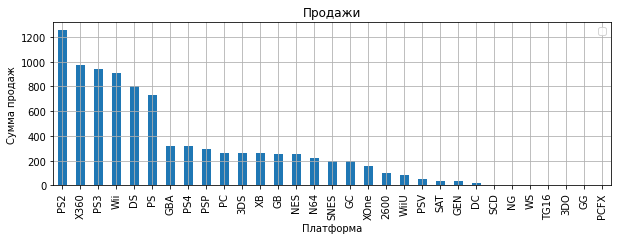

In [ ]:
# Какие платформы лидируют по продажам? Выберите несколько потенциально прибыльных платформ.

# Циферки
print()
display('Как менялись продажи по платформам:', sales_platform_pt)
print()
print('Общая сумма продаж:', sales_platform_pt['sum_sum_sales'].sum())
print()

# Графики
# Продажи
print()
display('Продажи:', sales_platform_pt.plot(x='platform_', 
                                           y='sum_sum_sales', 
                                           kind='bar', 
                                           grid=True, 
                                           figsize=(10, 3)))
plt.xlabel("Платформа")
plt.xticks(x=['platform_'], rotation = 90)
plt.ylabel("Сумма продаж")
plt.title('Продажи')
plt.legend('')
plt.show()

##### Вывод

    Потенциально выгодные платформы:
        PS2
        X360
        PS3
        Wii
        DS
        PS

#### Продажи на платформах растут или падают

'Платформа / Год / Сумма:'

,platform,year_of_release,sumsum_sales
0,XOne,"2,016.00",26.15
1,WiiU,"2,016.00",4.60
2,PS3,"2,016.00",3.60
3,PS4,"2,016.00",69.25
4,PSV,"2,016.00",4.25
...,...,...,...
105,DS,"2,005.00",130.14
106,PC,"2,005.00",4.37
107,XB,"2,005.00",49.08
108,PSP,"2,005.00",43.84


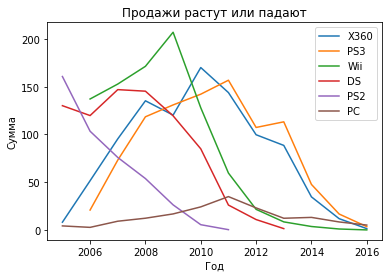

<Figure size 720x216 with 0 Axes>

In [ ]:
# Растут или падают продажи

# Делаем выборку по платформам и годам выхода
sales_by_platf_year = df_ac.pivot_table(index=['platform', 'year_of_release'], 
                                        values='sum_sales', 
                                        aggfunc=['sum']
                                        ).sort_values(by=('year_of_release'), 
                                                      ascending=False).reset_index()

# Убираем мультииндекс
sales_by_platf_year.columns = sales_by_platf_year.columns.map(''.join)
print()
display('Платформа / Год / Сумма:', sales_by_platf_year)
print()

# На каждый график своя табличка
X360_sum = sales_by_platf_year[sales_by_platf_year['platform'] == 'X360'].pivot_table(index=['year_of_release'], 
                                                                                      values='sumsum_sales', 
                                                                                      aggfunc=['sum']
                                                                                      ).reset_index()
X360_sum.columns = ['_'.join(col).strip() for col in X360_sum.columns.values]
PS3_sum = sales_by_platf_year[sales_by_platf_year['platform'] == 'PS3'].pivot_table(index=['year_of_release'], 
                                                                                    values='sumsum_sales', 
                                                                                    aggfunc=['sum']
                                                                                    ).reset_index()
PS3_sum.columns = ['_'.join(col).strip() for col in PS3_sum.columns.values]
Wii_sum = sales_by_platf_year[sales_by_platf_year['platform'] == 'Wii'].pivot_table(index=['year_of_release'], 
                                                                                    values='sumsum_sales', 
                                                                                    aggfunc=['sum']
                                                                                    ).reset_index()
Wii_sum.columns = ['_'.join(col).strip() for col in Wii_sum.columns.values]
DS_sum = sales_by_platf_year[sales_by_platf_year['platform'] == 'DS'].pivot_table(index=['year_of_release'], 
                                                                                  values='sumsum_sales', 
                                                                                  aggfunc=['sum']
                                                                                  ).reset_index()
DS_sum.columns = ['_'.join(col).strip() for col in DS_sum.columns.values]
PS2_sum = sales_by_platf_year[sales_by_platf_year['platform'] == 'PS2'].pivot_table(index=['year_of_release'], 
                                                                                    values='sumsum_sales', 
                                                                                    aggfunc=['sum']
                                                                                    ).reset_index()
PS2_sum.columns = ['_'.join(col).strip() for col in PS2_sum.columns.values]
PC_sum = sales_by_platf_year[sales_by_platf_year['platform'] == 'PC'].pivot_table(index=['year_of_release'], 
                                                                                  values='sumsum_sales', 
                                                                                  aggfunc=['sum']
                                                                                  ).reset_index()
PC_sum.columns = ['_'.join(col).strip() for col in PC_sum.columns.values]
#isplay('X360_sum', X360_sum)
#display('PS3_sum', PS3_sum)
#display('Wii_sum', Wii_sum)
#display('DS_sum', DS_sum)
#display('PS2_sum', PS2_sum)
#display('PC_sum', PC_sum)

# Ну и сами графики
plt.plot(X360_sum['year_of_release_'], 
         X360_sum['sum_sumsum_sales'], 
         label='X360')
plt.plot(PS3_sum['year_of_release_'], 
         PS3_sum['sum_sumsum_sales'], 
         label='PS3')
plt.plot(Wii_sum['year_of_release_'], 
         Wii_sum['sum_sumsum_sales'], 
         label='Wii')
plt.plot(DS_sum['year_of_release_'], 
         DS_sum['sum_sumsum_sales'], 
         label='DS')
plt.plot(PS2_sum['year_of_release_'], 
         PS2_sum['sum_sumsum_sales'], 
         label='PS2')
plt.plot(PC_sum['year_of_release_'], 
         PC_sum['sum_sumsum_sales'], 
         label='PC')
plt.title('Продажи растут или падают')
plt.ylabel('Сумма')
plt.xlabel('Год')
plt.legend()
plt.figure(figsize=(10,3))
plt.show()

##### Вывод

    - Еще раз наглядно: консоли приходят и уходят, а РС это надолго.
    - Все находится на спаде.
    - Давненько ничего не изобретали.

### «Ящик с усами» по глобальным продажам игр

    - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
    - Опишите результат.

Как менялись продажи по платформам.


,platform_,name_,year_of_release_,count_sum_sales,sum_sum_sales
0,Wii,Wii Sports,"2,006.00",1,82.54
1,NES,Super Mario Bros.,"1,985.00",1,40.24
2,Wii,Mario Kart Wii,"2,008.00",1,35.52
3,Wii,Wii Sports Resort,"2,009.00",1,32.77
4,GB,Pokemon Red/Pokemon Blue,"1,996.00",1,31.38
...,...,...,...,...,...
16438,X360,DoDonPachi Daifukkatsu: Black Label,"2,011.00",1,0.01
16439,PS2,Pachitte Chonmage Tatsujin 16: Pachinko Hissat...,"2,010.00",1,0.01
16440,PSP,Shinseiki Evangelion: Battle Orchestra Portable,"2,009.00",1,0.01
16441,PS2,SCORE International Baja 1000: The Official Game,"2,008.00",1,0.00



Общая сумма: 8814.37

Статистически средние продажи равны:
    - медиана = 0.16999999999999998
    - среднеарифметическое = 0.5360560724928541



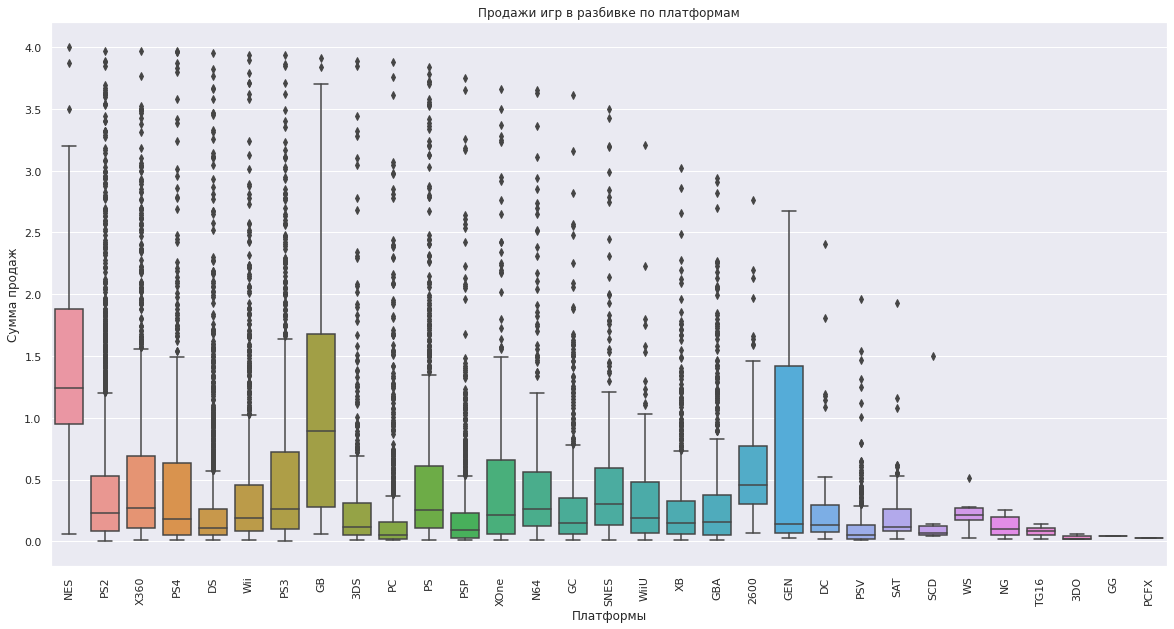

In [ ]:
# Продажи по платформам

# Делаем выборку по платформам, названиям и годам выхода
sales_platf_pt = df.pivot_table(index=['platform', 'name', 'year_of_release'], 
                                values='sum_sales', 
                                aggfunc=['count', 'sum']
                                ).sort_values(by=(  'sum', 'sum_sales'), 
                                              ascending=False
                                             ).reset_index()

# Убираем второй этаж в шапке
sales_platf_pt.columns = ['_'.join(col).strip() for col in sales_platf_pt.columns.values]

# Вкл/Выкл полнотабличный формат
pd.set_option('display.max_rows', 11)

print('Как менялись продажи по платформам.')
display(sales_platf_pt)
print()
print('Общая сумма:', sales_platf_pt['sum_sum_sales'].sum())
print()
print('Статистически средние продажи равны:')
print('    - медиана =', sales_platf_pt['sum_sum_sales'].median())
print('    - среднеарифметическое =', sales_platf_pt['sum_sum_sales'].mean())
print()

# Ограничиваем ось Y по самому длинному усу, а то совсем ничего не видно
sales_platf_pt = sales_platf_pt[sales_platf_pt['sum_sum_sales'] <= 4]

sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x='platform_', y='sum_sum_sales', data=sales_platf_pt)
plt.xticks(rotation=90)
plt.title('Продажи игр в разбивке по платформам')
plt.ylabel('Сумма продаж')
plt.xlabel('Платформы')
plt.show()


##### Вывод

    - Все медианы продаж заметно или сильно смещены в сторонц меньших сумм. Значит большинство игр продается плоховато.
    - Довольно много "выстреливших" игр почти на всех платформах. Но основная масса игр приносит в разы меньше денег.
    - В среднем игры продаются по 170 тыс. копий.

### Отзывы пользователей и критиков

,platform,critic_score,user_score,sum_sales
17,PS2,95.00,9,20.81
24,PS2,95.00,8.7,16.15
28,PS2,95.00,8.4,14.97
38,PS2,97.00,8.5,13.10
48,PS2,89.00,8.5,11.65
...,...,...,...,...
16670,PS2,NaN,unknown,0.01
16671,PS2,NaN,unknown,0.01
16683,PS2,NaN,unknown,0.01
16689,PS2,NaN,unknown,0.01


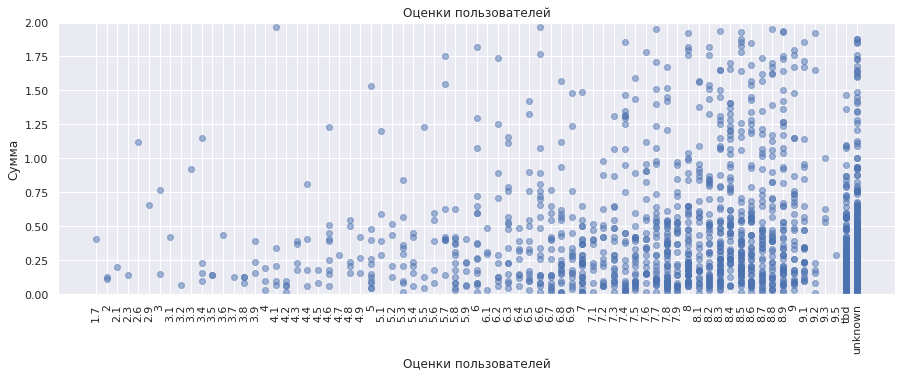

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

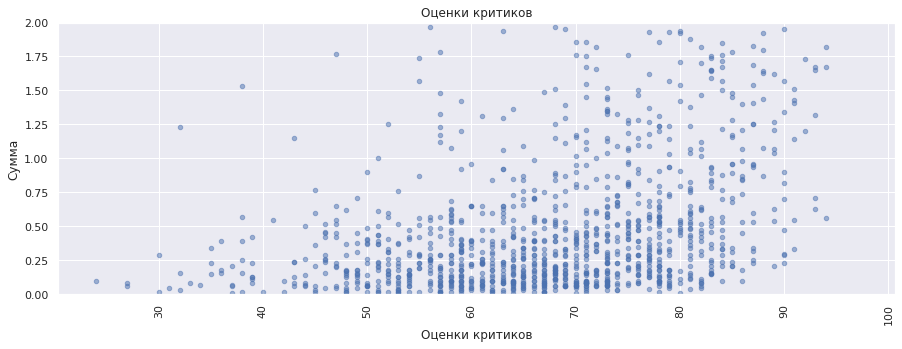


Коэффициент корреляции суммы от оценки критиков = 0.39543454945454876


In [ ]:
# Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
# Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

# Чтобы длинных строчек не писать, работаем в отдельной табличке
pop_platf_ps2 = df[df['platform'] == 'PS2']

# Удаляем лишние колонки
pop_platf_ps2 = pop_platf_ps2.drop(columns=['name', 
                                            'year_of_release', 
                                            'genre', 
                                            'na_sales', 
                                            'eu_sales', 
                                            'jp_sales', 
                                            'other_sales', 
                                            'rating', 
                                            'year_group', 
                                            'age', 
                                            'year_first']) 

# Удаляем nan, а то графики не строятся
pop_platf_ps2['user_score'] = pop_platf_ps2['user_score'].fillna('unknown')
# Упс, не везде можно nan удалять
#pop_platf_ps2['critic_score'] = pop_platf_ps2['critic_score'].fillna('unknown')

display(pop_platf_ps2)
print()

# График влияния на продажи отзывов пользователей.
pop_platf_ps2 = pop_platf_ps2.sort_values(by=('user_score'))
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(x = pop_platf_ps2['user_score'], 
           y = pop_platf_ps2['sum_sales'], 
           alpha=0.5)
plt.xlabel("Оценки пользователей")
plt.ylabel("Сумма")
plt.title('Оценки пользователей')
plt.xticks(rotation=90)
plt.ylim([0, 2])
plt.show()

# График влияния на продажи отзывов критиков.
display(pop_platf_ps2.plot(x='critic_score', 
                          y='sum_sales', 
                          kind='scatter', 
                          alpha=0.5, 
                          grid=True, 
                          figsize=(15, 5)))
plt.xlabel("Оценки критиков")
plt.ylabel("Сумма")
plt.title('Оценки критиков')
plt.xticks(rotation = 90)
plt.ylim([0, 2])
plt.show()

print()
print('Коэффициент корреляции суммы от оценки критиков =', pop_platf_ps2['critic_score'].corr(pop_platf_ps2['sum_sales']))

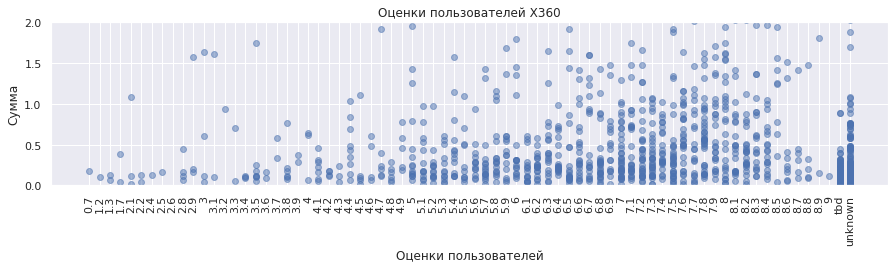

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

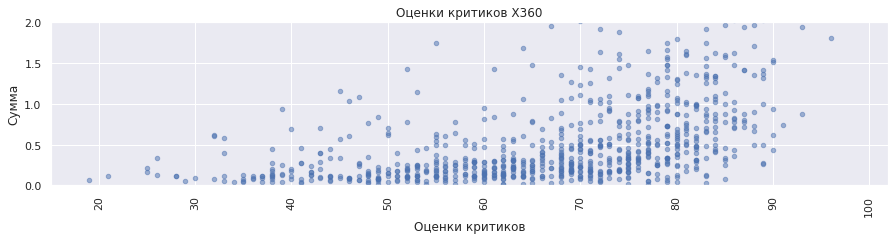

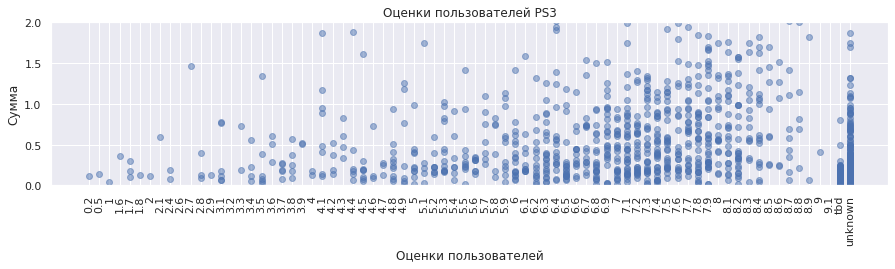

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

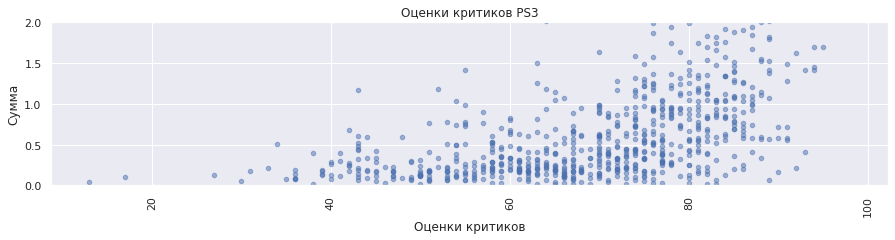

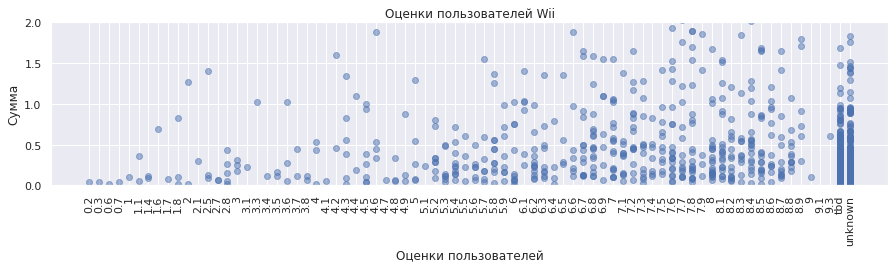

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

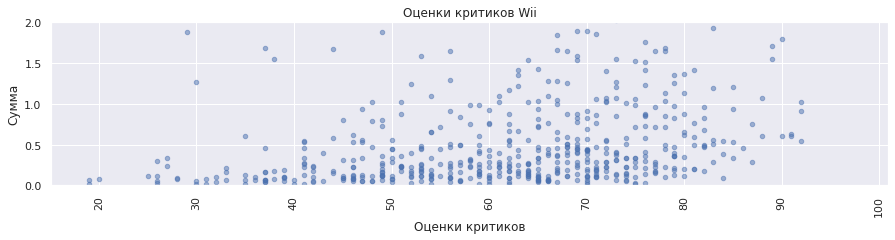

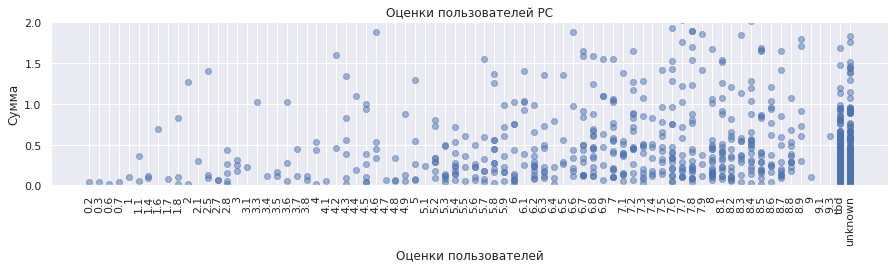

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

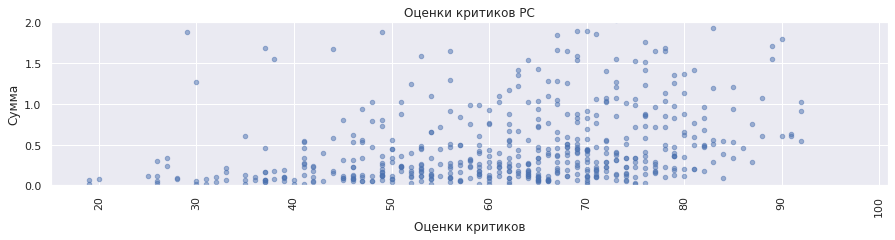

In [ ]:
# Посмотрим еще несколько платформ
# X360 PS3 Wii PC

pop_platf_X360 = df[df['platform'] == 'X360']
pop_platf_X360 = pop_platf_X360.drop(columns=['name', 
                                            'year_of_release', 
                                            'genre', 
                                            'na_sales', 
                                            'eu_sales', 
                                            'jp_sales', 
                                            'other_sales', 
                                            'rating', 
                                            'year_group', 
                                            'age', 
                                            'year_first']) 
pop_platf_X360['user_score'] = pop_platf_X360['user_score'].fillna('unknown')
pop_platf_X360 = pop_platf_X360.sort_values(by=('user_score'))
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = pop_platf_X360['user_score'], 
           y = pop_platf_X360['sum_sales'], 
           alpha=0.5)
plt.xlabel("Оценки пользователей")
plt.ylabel("Сумма")
plt.title('Оценки пользователей X360')
plt.xticks(rotation=90)
plt.ylim([0, 2])
plt.show()
display(pop_platf_X360.plot(x='critic_score', 
                          y='sum_sales', 
                          kind='scatter', 
                          alpha=0.5, 
                          grid=True, 
                          figsize=(15, 3)))
plt.xlabel("Оценки критиков")
plt.ylabel("Сумма")
plt.title('Оценки критиков X360')
plt.xticks(rotation = 90)
plt.ylim([0, 2])
plt.show()

pop_platf_PS3 = df[df['platform'] == 'PS3']
pop_platf_PS3 = pop_platf_PS3.drop(columns=['name', 
                                            'year_of_release', 
                                            'genre', 
                                            'na_sales', 
                                            'eu_sales', 
                                            'jp_sales', 
                                            'other_sales', 
                                            'rating', 
                                            'year_group', 
                                            'age', 
                                            'year_first']) 
pop_platf_PS3['user_score'] = pop_platf_PS3['user_score'].fillna('unknown')
pop_platf_PS3 = pop_platf_PS3.sort_values(by=('user_score'))
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = pop_platf_PS3['user_score'], 
           y = pop_platf_PS3['sum_sales'], 
           alpha=0.5)
plt.xlabel("Оценки пользователей")
plt.ylabel("Сумма")
plt.title('Оценки пользователей PS3')
plt.xticks(rotation=90)
plt.ylim([0, 2])
plt.show()
display(pop_platf_PS3.plot(x='critic_score', 
                          y='sum_sales', 
                          kind='scatter', 
                          alpha=0.5, 
                          grid=True, 
                          figsize=(15, 3)))
plt.xlabel("Оценки критиков")
plt.ylabel("Сумма")
plt.title('Оценки критиков PS3')
plt.xticks(rotation = 90)
plt.ylim([0, 2])
plt.show()

pop_platf_Wii = df[df['platform'] == 'Wii']
pop_platf_Wii = pop_platf_Wii.drop(columns=['name', 
                                            'year_of_release', 
                                            'genre', 
                                            'na_sales', 
                                            'eu_sales', 
                                            'jp_sales', 
                                            'other_sales', 
                                            'rating', 
                                            'year_group', 
                                            'age', 
                                            'year_first']) 
pop_platf_Wii['user_score'] = pop_platf_Wii['user_score'].fillna('unknown')
pop_platf_Wii = pop_platf_Wii.sort_values(by=('user_score'))
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = pop_platf_Wii['user_score'], 
           y = pop_platf_Wii['sum_sales'], 
           alpha=0.5)
plt.xlabel("Оценки пользователей")
plt.ylabel("Сумма")
plt.title('Оценки пользователей Wii')
plt.xticks(rotation=90)
plt.ylim([0, 2])
plt.show()
display(pop_platf_Wii.plot(x='critic_score', 
                          y='sum_sales', 
                          kind='scatter', 
                          alpha=0.5, 
                          grid=True, 
                          figsize=(15, 3)))
plt.xlabel("Оценки критиков")
plt.ylabel("Сумма")
plt.title('Оценки критиков Wii')
plt.xticks(rotation = 90)
plt.ylim([0, 2])
plt.show()

pop_platf_PC = df[df['platform'] == 'PC']
pop_platf_PC = pop_platf_PC.drop(columns=['name', 
                                            'year_of_release', 
                                            'genre', 
                                            'na_sales', 
                                            'eu_sales', 
                                            'jp_sales', 
                                            'other_sales', 
                                            'rating', 
                                            'year_group', 
                                            'age', 
                                            'year_first']) 
pop_platf_PC['user_score'] = pop_platf_PC['user_score'].fillna('unknown')
pop_platf_PC = pop_platf_Wii.sort_values(by=('user_score'))
fig, ax = plt.subplots(figsize=(15, 3))
ax.scatter(x = pop_platf_PC['user_score'], 
           y = pop_platf_PC['sum_sales'], 
           alpha=0.5)
plt.xlabel("Оценки пользователей")
plt.ylabel("Сумма")
plt.title('Оценки пользователей PC')
plt.xticks(rotation=90)
plt.ylim([0, 2])
plt.show()
display(pop_platf_PC.plot(x='critic_score', 
                          y='sum_sales', 
                          kind='scatter', 
                          alpha=0.5, 
                          grid=True, 
                          figsize=(15, 3)))
plt.xlabel("Оценки критиков")
plt.ylabel("Сумма")
plt.title('Оценки критиков PC')
plt.xticks(rotation = 90)
plt.ylim([0, 2])
plt.show()

##### Вывод 

    Положительные оценки как критиков, так и пользователей благотворно влияют на продажи, причем критиков сильнее. 
    Но корреляция не большая, так что не сильно влияют. 
    Но влияют.

### Общее распределение игр по жанрам

    - Посмотрите на общее распределение игр по жанрам. 
    - Что можно сказать о самых прибыльных жанрах? 
    - Выделяются ли жанры с высокими и низкими продажами?


Как менялись продажи по жанрам.


,genre_,sum_sum_sales
0,Action,"1,744.17"
1,Sports,"1,331.27"
2,Shooter,"1,052.45"
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.



Общая сумма: 8915.71


<AxesSubplot:xlabel='genre_', ylabel='sum_sum_sales'>

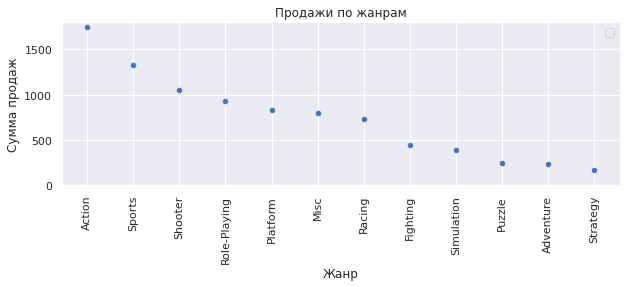

Как менялись продажи по жанрам.


,genre_,name_,year_of_release_,count_sum_sales,sum_sum_sales
0,Sports,Wii Sports,"2,006.00",1,82.54
1,Platform,Super Mario Bros.,"1,985.00",1,40.24
2,Action,Grand Theft Auto V,"2,013.00",2,37.32
3,Racing,Mario Kart Wii,"2,008.00",1,35.52
4,Sports,Wii Sports Resort,"2,009.00",1,32.77
...,...,...,...,...,...
12191,Adventure,Junjou Romanchika: Koi no Doki Doki Daisakusen,"2,008.00",1,0.01
12192,Action,Original Frisbee Disc Sports: Ultimate & Golf,"2,007.00",1,0.01
12193,Strategy,Command & Conquer 4: Tiberian Twilight,"2,010.00",1,0.01
12194,Strategy,Command & Conquer Collection,"2,003.00",1,0.01



Общая сумма: 8814.369999999999



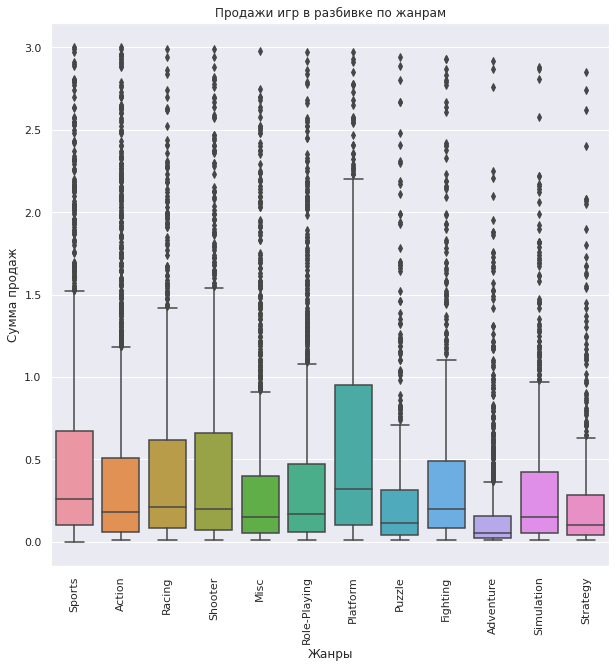

'Медианы продаж'

,median
,sum_sum_sales
genre_,
Adventure,0.05
Strategy,0.10
Puzzle,0.11
Simulation,0.15
Misc,0.15
...,...
Fighting,0.20
Shooter,0.20


In [ ]:
# Посмотрите на общее распределение игр по жанрам.

# Делаем выборку по жанру
sales_genre_pt = df.pivot_table(index=['genre'], 
                                values='sum_sales', 
                                aggfunc=['sum']
                                ).sort_values(by=(  'sum', 'sum_sales'), 
                                              ascending=False).reset_index()

# Убираем второй этаж в шапке
sales_genre_pt.columns = ['_'.join(col).strip() for col in sales_genre_pt.columns.values]

# Вкл/Выкл полнотабличный формат
pd.set_option('display.max_rows', None)

print()
print('Как менялись продажи по жанрам.')
display(sales_genre_pt)
print()
print('Общая сумма:', df['sum_sales'].sum())

# График распределения
display(sales_genre_pt.plot(x='genre_', 
                            y='sum_sum_sales', 
                            ylim=(0, 1800), 
                            kind='scatter', 
                            grid=True, 
                            figsize=(10, 3)))
plt.xlabel("Жанр")
plt.xticks(x=['genre_'], rotation = 90)
plt.ylabel("Сумма продаж")
plt.title('Продажи по жанрам')
plt.legend('')
plt.show()

# Прибыль по жанрам
# Делаем выборку по жанрам, названиям и годам выхода
sales_genre_pt = df.pivot_table(index=['genre', 'name', 'year_of_release'], 
                                values='sum_sales', 
                                aggfunc=['count', 'sum']
                                ).sort_values(by=(  'sum', 'sum_sales'), 
                                              ascending=False
                                             ).reset_index()

# Убираем второй этаж в шапке
sales_genre_pt.columns = ['_'.join(col).strip() for col in sales_genre_pt.columns.values]

# Вкл/Выкл полнотабличный формат
pd.set_option('display.max_rows', 11)

print('Как менялись продажи по жанрам.')
display(sales_genre_pt)
print()
print('Общая сумма:', sales_genre_pt['sum_sum_sales'].sum())
print()

# Ограничиваем ось Y по самому длинному усу, а то совсем ничего не видно
sales_genre_pt = sales_genre_pt[sales_genre_pt['sum_sum_sales'] <= 3]

sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='genre_', y='sum_sum_sales', data=sales_genre_pt)
plt.xticks(rotation=90)
plt.title('Продажи игр в разбивке по жанрам')
plt.ylabel('Сумма продаж')
plt.xlabel('Жанры')
plt.show()

# Третее место не видать
display('Медианы продаж', pd.pivot_table(sales_genre_pt, 
                                         index=['genre_'], 
                                         values=['sum_sum_sales'], 
                                         aggfunc=['median']
                                         ).sort_values(by=('median', 'sum_sum_sales')))

##### Вывод

    - Самые популярные игры это
        -- Action
        -- Sports
        -- Shooter
      Замена реальной двигательной деятельности?
    - Чем больше к игре нужно подключать мозг, тем менее они популярны.
    - Самые прибыльные жанры это (ориентируемся на медианы продаж)
        -- Platform
        -- Sports
        -- Racing

## Шаг 4. Составьте портрет пользователя каждого региона

  Определите для пользователя каждого региона (NA, EU, JP):

*   **[ V ]**  Самые популярные платформы (топ-5). Опишите различия в долях продаж.
*   **[ V ]**  Самые популярные жанры (топ-5). Поясните разницу.
*   **[ V ]**  Влияет ли рейтинг ESRB на продажи в отдельном регионе?


### Самые популярные платформы (топ-5)

In [ ]:
# Самые популярные платформы (топ-5). Опишите различия в долях продаж.

# Добавляем столбец сумма по платформе
df = df.assign(sum_sales_platf = df.platform)
for platform in df['platform'].unique():
    sum_sales_s = (df[(df['platform'] == platform)]['sum_sales'].sum())
    df['sum_sales_platf'].where(~(df.sum_sales_platf == platform), other=sum_sales_s, inplace=True)


print()
print('Пропусков в sum_sales_platf:', df['sum_sales_platf'].isna().mean())

# TOP  в Америке
# Делаем выборку по плаиформе и сумме продаж в Америке
pop_platf_na_pt = df.pivot_table(index=['platform', 'sum_sales_platf'], 
                                 values=['na_sales'], 
                                 aggfunc=['sum']
                                 ).sort_values(by=(  'sum', 'na_sales'), 
                                               ascending=False).reset_index()

# Убираем второй этаж в шапке
pop_platf_na_pt.columns = ['_'.join(col).strip() for col in pop_platf_na_pt.columns.values]

# Добавляем столбец процент продаж по региону
pop_platf_na_pt['na_sales_percent'] = 100 * pop_platf_na_pt['sum_na_sales'] / pop_platf_na_pt['sum_sales_platf_']
print()
display('TOP5 в Америке', pop_platf_na_pt.head(5))

# TOP  в Европе
# Делаем выборку по плаиформе и сумме продаж в Европе
pop_platf_eu_pt = df.pivot_table(index=['platform', 'sum_sales_platf'], 
                                 values='eu_sales', 
                                 aggfunc=['sum']
                                 ).sort_values(by=(  'sum', 'eu_sales'), 
                                               ascending=False).reset_index()
pop_platf_eu_pt.columns = ['_'.join(col).strip() for col in pop_platf_eu_pt.columns.values]
pop_platf_eu_pt['eu_sales_percent'] = 100 * pop_platf_eu_pt['sum_eu_sales'] / pop_platf_eu_pt['sum_sales_platf_']
print()
display('TOP5 в Европе', pop_platf_eu_pt.head(5))

# TOP  в Японии
# Делаем выборку по плаиформе и сумме продаж в Японии
pop_platf_jp_pt = df.pivot_table(index=['platform', 'sum_sales_platf'], 
                                 values='jp_sales', 
                                 aggfunc=['sum']
                                 ).sort_values(by=(  'sum', 'jp_sales'), 
                                               ascending=False).reset_index()
pop_platf_jp_pt.columns = ['_'.join(col).strip() for col in pop_platf_jp_pt.columns.values]
pop_platf_jp_pt['jp_sales_percent'] = 100 * pop_platf_jp_pt['sum_jp_sales'] / pop_platf_jp_pt['sum_sales_platf_']
print()
display('TOP5 в Японии', pop_platf_jp_pt.head(5))


Пропусков в sum_sales_platf: 0.0



'TOP5 в Америке'

,platform_,sum_sales_platf_,sum_na_sales,na_sales_percent
0,X360,971.42,602.47,62.02
1,PS2,"1,255.77",583.84,46.49
2,Wii,907.51,496.90,54.75
3,PS3,939.65,393.49,41.88
4,DS,806.12,382.40,47.44


'TOP5 в Европе'

,platform_,sum_sales_platf_,sum_eu_sales,eu_sales_percent
0,PS2,"1,255.77",339.29,27.02
1,PS3,939.65,330.29,35.15
2,X360,971.42,270.76,27.87
3,Wii,907.51,262.21,28.89
4,PS,730.86,213.61,29.23


'TOP5 в Японии'

,platform_,sum_sales_platf_,sum_jp_sales,jp_sales_percent
0,DS,806.12,175.57,21.78
1,PS,730.86,139.82,19.13
2,PS2,"1,255.77",139.20,11.08
3,SNES,200.04,116.55,58.26
4,3DS,259.00,100.67,38.87


##### Вывод

    - Первое место по продажам в каждом регионе занимает своя платворма.
    - В ТОР5 трех регионов входит только PS2.
    - По платформам из ТОР5
        -- Америка скупает 40-50% игр
        -- Европа процентов 30 игр
        -- Япония порядка 20
    - В Японии есть любимые приставки, по которым она скупает половину игр.

### Самые популярные жанры (топ-5)

In [ ]:
# Самые популярные жанры (топ-5). Поясните разницу.

# Добавляем столбец сумма по жанру
df = df.assign(sum_sales_genre = df.genre)
for genre in df['genre'].unique():
    sum_sales_s = (df[(df['genre'] == genre)]['sum_sales'].sum())
    df['sum_sales_genre'].where(~(df.sum_sales_genre == genre), other=sum_sales_s, inplace=True)

print()
print('Пропусков в sum_sales_genre:', df['sum_sales_genre'].isna().mean()*100, '%')
print('Всего значений sum_sales_genre:', len(df['sum_sales_genre']))

# TOP в Америке
# Делаем выборку по жанру и сумме продаж в Америке
pop_genre_na_pt = df.pivot_table(index=['genre', 'sum_sales_genre'], 
                                 values=['na_sales'], 
                                 aggfunc=['sum']
                                 ).sort_values(by=(  'sum', 'na_sales'), 
                                               ascending=False).reset_index()
pop_genre_na_pt.columns = ['_'.join(col).strip() for col in pop_genre_na_pt.columns.values]
pop_genre_na_pt['na_sales_percent'] = 100 * pop_genre_na_pt['sum_na_sales'] / pop_genre_na_pt['sum_sales_genre_']
print()
display('TOP5 в Америке', pop_genre_na_pt.head(5))

# TOP в Европе
# Делаем выборку по жанру и сумме продаж в Европе
pop_genre_eu_pt = df.pivot_table(index=['genre', 'sum_sales_genre'], 
                                 values='eu_sales', 
                                 aggfunc=['sum']
                                 ).sort_values(by=(  'sum', 'eu_sales'), 
                                               ascending=False).reset_index()
pop_genre_eu_pt.columns = ['_'.join(col).strip() for col in pop_genre_eu_pt.columns.values]
pop_genre_eu_pt['eu_sales_percent'] = 100 * pop_genre_eu_pt['sum_eu_sales'] / pop_genre_eu_pt['sum_sales_genre_']
print()
display('TOP5 в Европе', pop_genre_eu_pt.head(5))

# TOP в Японии
# Делаем выборку по жанру и сумме продаж в Японии
pop_genre_jp_pt = df.pivot_table(index=['genre', 'sum_sales_genre'], 
                                 values='jp_sales', 
                                 aggfunc=['sum']
                                 ).sort_values(by=(  'sum', 'jp_sales'), 
                                               ascending=False).reset_index()
pop_genre_jp_pt.columns = ['_'.join(col).strip() for col in pop_genre_jp_pt.columns.values]
pop_genre_jp_pt['jp_sales_percent'] = 100 * pop_genre_jp_pt['sum_jp_sales'] / pop_genre_jp_pt['sum_sales_genre_']
print()
display('TOP5 в Японии', pop_genre_jp_pt.head(5))


Пропусков в sum_sales_genre: 0.011965300628178284 %
Всего значений sum_sales_genre: 16715



'TOP5 в Америке'

,genre_,sum_sales_genre_,sum_na_sales,na_sales_percent
0,Action,"1,744.17",879.01,50.40
1,Sports,"1,331.27",684.43,51.41
2,Shooter,"1,052.45",592.24,56.27
3,Platform,827.77,445.50,53.82
4,Misc,802.51,407.27,50.75


'TOP5 в Европе'

,genre_,sum_sales_genre_,sum_eu_sales,eu_sales_percent
0,Action,"1,744.17",519.13,29.76
1,Sports,"1,331.27",376.79,28.30
2,Shooter,"1,052.45",317.34,30.15
3,Racing,728.67,236.51,32.46
4,Misc,802.51,212.74,26.51


'TOP5 в Японии'

,genre_,sum_sales_genre_,sum_jp_sales,jp_sales_percent
0,Role-Playing,934.56,355.41,38.03
1,Action,"1,744.17",161.43,9.26
2,Sports,"1,331.27",135.54,10.18
3,Platform,827.77,130.83,15.81
4,Misc,802.51,108.11,13.47


##### Вывод

    - Первое место по продажам в Америке и Европе занимают Action и Sport.
      В Японии они занимают 2 и 3 место соответственно.
    - В ТОР5 трех регионов входzт
        -- Action
        -- Sport
        -- Misc
    - По платформам из ТОР5
        -- Америка скупает половину игр
        -- Европа порядка 30%
        -- Япония процентов 15
    - В Японии есть любимый жанр Role-Playing, который опережает ближайшего соперника как по сумме продаж, так и по доле от общемировых продаж.

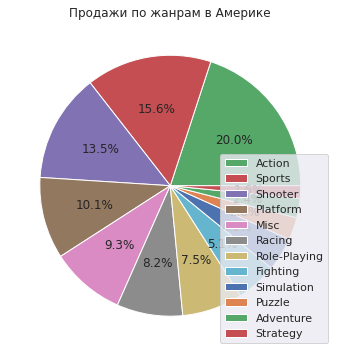

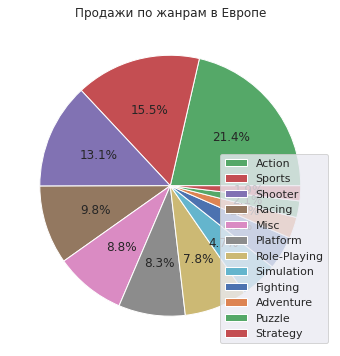

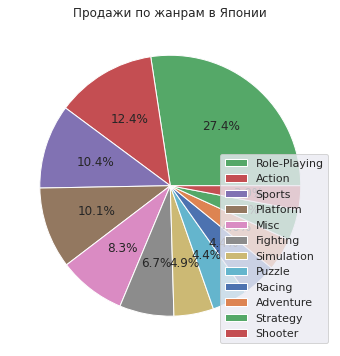

In [ ]:
# Картинки

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(pop_genre_na_pt['sum_na_sales'])
patches, texts, auto = ax1.pie(pop_genre_na_pt['sum_na_sales'], autopct='%1.1f%%' )
plt.legend(patches, pop_genre_na_pt['genre_'], loc="lower right")
plt.title('Продажи по жанрам в Америке')
plt.show()

fig2, ax2 = plt.subplots(figsize=(6, 6))
ax2.pie(pop_genre_eu_pt['sum_eu_sales'])
patches, texts, auto = ax2.pie(pop_genre_eu_pt['sum_eu_sales'], autopct='%1.1f%%' )
plt.legend(patches, pop_genre_eu_pt['genre_'], loc="lower right")
plt.title('Продажи по жанрам в Европе')
plt.show()

fig3, ax3 = plt.subplots(figsize=(6, 6))
ax3.pie(pop_genre_jp_pt['sum_jp_sales'])
patches, texts, auto = ax3.pie(pop_genre_jp_pt['sum_jp_sales'], autopct='%1.1f%%' )
plt.legend(patches, pop_genre_jp_pt['genre_'], loc="lower right")
plt.title('Продажи по жанрам в Японии')
plt.show()


### Влияет ли рейтинг ESRB на продажи

,rating_,sum_eu_sales,sum_jp_sales,sum_na_sales,sum_other_sales
0,EC,0.11,0.00,1.53,0.11
1,E,710.25,198.11,"1,292.99",234.17
2,K-A,0.27,1.46,2.56,0.03
3,E10+,188.52,40.20,353.32,73.56
4,T,427.03,151.40,759.75,155.17
5,M,483.97,64.24,748.48,177.10
6,AO,0.61,0.00,1.26,0.09
7,RP,0.08,0.00,0.00,0.01


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_na_sales'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_eu_sales'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_jp_sales'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_other_sales'>

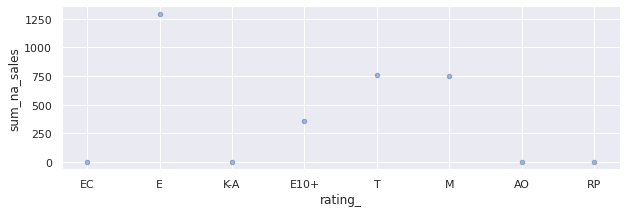

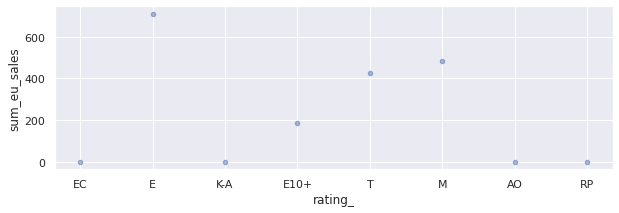

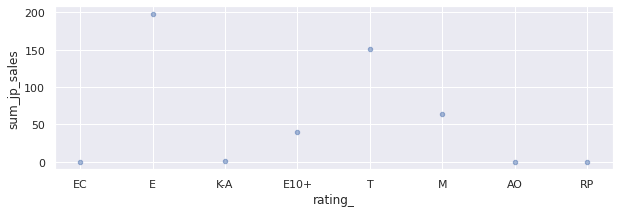

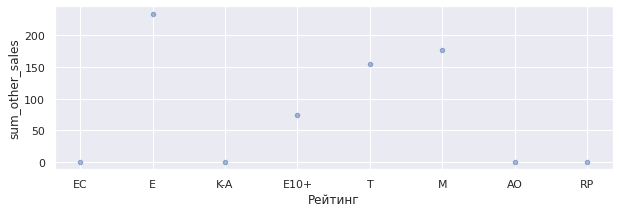

In [ ]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?

# Делаем выборку по рейтингу
rating_na_sales = df.pivot_table(index=['rating'], 
                                 values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                 aggfunc=['sum']
                                 ).sort_values(by=(  'sum', 'na_sales'), 
                                               ascending=False).reset_index()

# Убираем второй этаж в шапке
rating_na_sales.columns = ['_'.join(col).strip() for col in rating_na_sales.columns.values]

# Выстраиваем порядок рейтинга в EC, E, K-A, E10+, T, M, AO, RP. Согласно возрастным и этическим ограничениям.
def swap_rows(df, i1, i2):
    ''' Функция смены местами двух строк фрейма.'''
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

swap_rows(rating_na_sales, 0, 5)
swap_rows(rating_na_sales, 1, 5)
swap_rows(rating_na_sales, 2, 4)
swap_rows(rating_na_sales, 4, 5)
display(rating_na_sales)

# График влияния на продажи рейтинга
display(rating_na_sales.plot(x='rating_', 
                             y='sum_na_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
display(rating_na_sales.plot(x='rating_', 
                             y='sum_eu_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
display(rating_na_sales.plot(x='rating_', 
                             y='sum_jp_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
display(rating_na_sales.plot(x='rating_', 
                             y='sum_other_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
plt.xlabel("Рейтинг")
plt.ylabel('sum_other_sales')
plt.title('')
plt.show()

##### Вывод

    Не похоже, что рейтинг ESRB влияет на продажи.
    Это скорее ограничения для продавцов.
    С помощью этого рейтинга можно вычислить зависимость продаж от контента игры.

In [ ]:
# Комментарий ревьюера
temp = df.copy()
print(temp.year_of_release.min())
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

1980.0
6766 0.4047861202512713


E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

,rating_,sum_eu_sales,sum_jp_sales,sum_na_sales,sum_other_sales
0,E,83.36,15.14,79.05,22.61
1,E10+,42.69,5.89,54.24,12.57
2,T,41.95,20.59,49.79,14.29
3,M,145.32,14.11,165.21,47.04
4,unknown,78.91,85.05,89.42,23.46


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_na_sales'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_eu_sales'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_jp_sales'>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rating_', ylabel='sum_other_sales'>

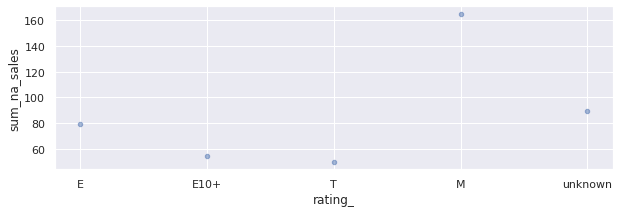

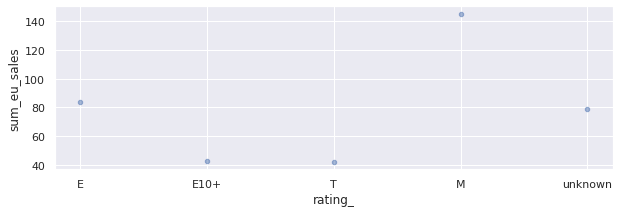

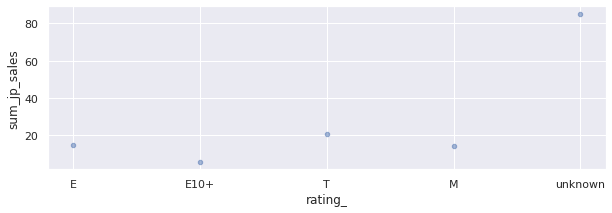

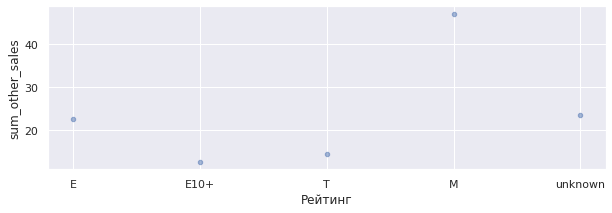

In [ ]:
# Комментарий студента

# Удаляем nan в `rating`
df['rating'] = df['rating'].fillna('unknown')

# Смотрим значения только с 2013 года
df_ac_23 = df[df['year_of_release'] >= 2013]

# Делаем выборку по рейтингу
rating_na_sales = df_ac_23.pivot_table(index=['rating'], 
                                       values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
                                       aggfunc=['sum']
                                       ).sort_values(by=(  'sum', 'na_sales'), 
                                                     ascending=False).reset_index()

# Убираем второй этаж в шапке
rating_na_sales.columns = ['_'.join(col).strip() for col in rating_na_sales.columns.values]

# Выстраиваем порядок рейтинга в EC, E, K-A, E10+, T, M, AO, RP. Согласно возрастным и этическим ограничениям.
def swap_rows(df, i1, i2):
    ''' Функция смены местами двух строк фрейма.'''
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

swap_rows(rating_na_sales, 0, 2)
swap_rows(rating_na_sales, 1, 3)
swap_rows(rating_na_sales, 3, 4)
swap_rows(rating_na_sales, 2, 3)
display(rating_na_sales)

# График влияния на продажи рейтинга
display(rating_na_sales.plot(x='rating_', 
                             y='sum_na_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
display(rating_na_sales.plot(x='rating_', 
                             y='sum_eu_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
display(rating_na_sales.plot(x='rating_', 
                             y='sum_jp_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
display(rating_na_sales.plot(x='rating_', 
                             y='sum_other_sales', 
                             kind='scatter', 
                             alpha=0.5, 
                             grid=True, 
                             figsize=(10, 3)))
plt.xlabel("Рейтинг")
plt.ylabel('sum_other_sales')
plt.title('')
plt.show()

## Шаг 5. Проверьте гипотезы

*   **[ V ]**  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
*   **[ V ]**  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

*   **[ V ]**  Как вы сформулировали нулевую и альтернативную гипотезы;
*   **[ V ]**  Какой критерий применили для проверки гипотез и почему.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
# удаляем мешающие значения
df = df.loc[df['user_score'] != 'tbd'].dropna().astype({'user_score': float})

# Проверяем гипотезу
print()
xone = df[(df['platform'] == 'XOne')]['user_score']
display('XOne:', xone.sort_values().unique())
print()
pc = df[(df['platform'] == 'PC')]['user_score']
display('PC:', pc.sort_values().unique())

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    xone, 
    pc)
print()
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Одинаковость средних пользовательских рейтингов платформ не определена.")

'XOne:'

array([2.1, 3. , 3.1, 3.2, 4. , 4.1, 4.2, 4.3, 4.4, 4.6, 4.9, 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.6,
       6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9,
       8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.9, 9.2])

'PC:'

array([1.4, 2.1, 2.2, 2.4, 2.5, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3])


p-значение:  0.00010211482734739934
Отвергаем нулевую гипотезу.
Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.


In [ ]:
# Комментарий ревьюера
df.year_of_release.min()

1985.0

In [ ]:
# Комментарий студента

# Тоже самое, но за 3 последних года
df = df.loc[df['user_score'] != 'tbd'].dropna().astype({'user_score': float})
df_ac_23 = df[df['year_of_release'] >= 2013]
# Проверяем гипотезу
print()
xone = df_ac_23[(df_ac_23['platform'] == 'XOne')]['user_score']
display('XOne:', xone.sort_values().unique())
print()
pc = df_ac_23[(df_ac_23['platform'] == 'PC')]['user_score']
display('PC:', pc.sort_values().unique())

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    xone, 
    pc)
print()
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Одинаковость средних пользовательских рейтингов платформ не определена.")

'XOne:'

array([2.1, 3. , 3.1, 3.2, 4. , 4.1, 4.2, 4.3, 4.4, 4.6, 4.9, 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.6,
       6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9,
       8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.9, 9.2])

'PC:'

array([1.4, 2.1, 2.2, 2.4, 2.5, 2.9, 3. , 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 5.1, 5.3, 5.4, 5.5,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.7, 6.8, 6.9, 7. ,
       7.1, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
       8.5, 8.6, 8.7, 8.9, 9.3])


p-значение:  0.17306926618147322
Не получилось отвергнуть нулевую гипотезу.
Одинаковость средних пользовательских рейтингов платформ не определена.


### Средние пользовательские рейтинги жанров Action и Sports разные

In [ ]:
# Математика позволяет проверить альтернативную гипотезу:
# "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
print()
action = df[(df['genre'] == 'Action')]['user_score'].astype({'user_score': float})
display('Action:', action.sort_values().unique())
print()
sports = df[(df['genre'] == 'Sports')]['user_score'].astype({'user_score': float})
display('Sports:', sports.sort_values().unique())

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем альтернативную гипотезу

results = st.ttest_ind(
    action, 
    sports)
print()
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем альтернативную гипотезу.")
    print("Средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не получилось отвергнуть альтернативную гипотезу.")
    print("Одинаковость, а значит и разность, средних пользовательских рейтингов жанров не определенаю.")

'Action:'

array([1.2, 1.5, 1.7, 2. , 2.2, 2.3, 2.4, 2.5, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
       5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
       8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4])

'Sports:'

array([0.7, 1.5, 1.8, 1.9, 2. , 2.1, 2.4, 2.7, 2.8, 3. , 3.1, 3.2, 3.4,
       3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
       4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ,
       6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3,
       7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6,
       8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5])


p-значение:  0.9785200320585197
Не получилось отвергнуть альтернативную гипотезу.
Одинаковость, а значит и разность, средних пользовательских рейтингов жанров не определенаю.


In [ ]:
# Комментарий студента

# Тоже самое, но за 3 последних года

# Математика позволяет проверить альтернативную гипотезу:
# "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
print()
action = df_ac_23[(df_ac_23['genre'] == 'Action')]['user_score'].astype({'user_score': float})
display('Action:', action.sort_values().unique())
print()
sports = df_ac_23[(df_ac_23['genre'] == 'Sports')]['user_score'].astype({'user_score': float})
display('Sports:', sports.sort_values().unique())

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем альтернативную гипотезу

results = st.ttest_ind(
    action, 
    sports)
print()
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем альтернативную гипотезу.")
    print("Средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не получилось отвергнуть альтернативную гипотезу.")
    print("Одинаковость, а значит и разность, средних пользовательских рейтингов жанров не определенаю.")

'Action:'

array([2. , 2.3, 2.4, 2.5, 3. , 3.1, 3.2, 3.3, 3.5, 3.6, 3.7, 3.8, 4.1,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1,
       8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.9, 9. , 9.1])

'Sports:'

array([1.5, 1.9, 2.1, 2.7, 3.1, 3.2, 3.4, 3.6, 3.7, 3.8, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 8.2, 8.3, 8.7])


p-значение:  1.684099430689953e-16
Отвергаем альтернативную гипотезу.
Средние пользовательские рейтинги жанров Action и Sports разные.


## Шаг 6. Общий вывод

Исследование данных для выявления определяющих успешность игры закономерностей, согласно прилагаемому заданию выполнено в полном объеме.

Полные промежутоные выводы вынесены в содержание для простоты ориентирования и получения больших подробностей. А выжимки из них таковы:
        
    - 2008-2009 годы были пиком в продаже игр. Далее идет спад.
    - Среди консолей есть 6 лидеров. PS2 первая из них.
    - Игровые консоли приходят и уходят, а РС с 1985 года и по сегодня.
    - Средний срок жизни игровых платформ 11-12 лет.
    - Средний строк появления новой платформы 1 год.
    - Потенциально выгодные платформы: PS2, X360, PS3, Wii, DS, PS.
    - В среднем игры продаются по 170 тыс. копий.
    - Положительные оценки критиков и пользователей благотворно влияют на продажи. 
    - Самые популярные жанры это Action, Sports, Shooter.
    - Чем больше к игре нужно подключать мозг, тем менее они популярны.
    - Самые прибыльные жанры это Platform, Sports, Racing
    - Первое место по продажам в каждом регионе занимают разные платформы.
      В ТОР5 трех регионов входит только PS2.
    - В ТОР5 трех регионов входят жанры Action, Sport, Misc.
    - Не похоже, что рейтинг ESRB влияет на продажи.
      Но с помощью этого рейтинга можно вычислить зависимость продаж от контента игры.
    
Также были проверены две гипотезы относительно игровых платформ и жанров игр:

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
    -- Нет, не одинаковые.

    - Средние пользовательские рейтинги жанров Action и Sports разные?
    -- Разность пользовательских рейтингов указанных жанров не определена.
    
    - Если для проверки гипотез брать только 3 последних года, то результаты будут противоположными:
    -- Разность пользовательских рейтингов Xbox One и PC не определена.
    -- Средние пользовательские рейтинги жанров Action и Sports не одинаковые.